# Resampling Datetime Data

Nena Esaw

### Part 1: Load the data and create a datetime index

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

df = pd.read_csv('Data/london_weather_MODIFIED - london_weather_MODIFIED.csv')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


#### Convert the date column to datetime dtype

In [2]:
pd.to_datetime(df['date'])


0       1970-01-01 00:00:00.019790101
1       1970-01-01 00:00:00.019790102
2       1970-01-01 00:00:00.019790103
3       1970-01-01 00:00:00.019790104
4       1970-01-01 00:00:00.019790105
                     ...             
15336   1970-01-01 00:00:00.020201227
15337   1970-01-01 00:00:00.020201228
15338   1970-01-01 00:00:00.020201229
15339   1970-01-01 00:00:00.020201230
15340   1970-01-01 00:00:00.020201231
Name: date, Length: 15341, dtype: datetime64[ns]

In [3]:
#need to parse the dates 
df ['date'] = pd.to_datetime(df['date'], format = '%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

#### Set the date column as the index

In [4]:
#set as an index 
df = df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [5]:
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

#### Filter out only the required data

* Keep only data from the year 2000 or later.
* Keep only the following features:
    * precipitation
    * mean_temp
    * min_temp
    * max_temp
    * snow_depth

In [6]:
df = df.loc['2000':, ['precipitation','mean_temp','min_temp','max_temp', 'snow_depth']]
df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


#### Impute any missing values

In [7]:
#check for missing values 
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [8]:
## interpolating temperature measures
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()


In [9]:
#Impute missing precipitation values with 0
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

In [10]:
#verify for missing values have been taken care of 
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)

* For each of the following questions, make a new copy of the dataframe resampled to the correct frequency for the question.

* Plot the feature that the question is asking about.
    * If there is a specific time period, plot only that time period.

In [11]:
#Create temporary df of data from 2000-2010
precip_cols = ['precipitation']
precip_df = df.loc[: '2010', precip_cols]
precip_df

,precipitation
date,
2000-01-01,0.0
2000-01-02,0.2
2000-01-03,6.0
2000-01-04,0.2
2000-01-05,0.8
...,...
2010-12-27,5.0
2010-12-28,0.4
2010-12-29,1.4


### Q1: What month had the most precipitation between 2000 through 2010?

#### Resample the data as Monthly frequency.

In [12]:
#Resample to monthly frequency
precip_df_MS = precip_df.resample("MS").sum()
precip_df_MS

,precipitation
date,
2000-01-01,14.3
2000-02-01,62.2
2000-03-01,13.4
2000-04-01,71.8
2000-05-01,68.4
...,...
2010-08-01,83.8
2010-09-01,38.0
2010-10-01,61.0


#### Find the date and corresponding value for the max precipitation.

In [13]:
#Find date and corresponding value for max precipitation
date_max_precip = precip_df_MS['precipitation'].idxmax()
max_precip = precip_df_MS['precipitation'].max()

print(f"The highest monthly precipitation of {max_precip:,.2f} inches occurred on {date_max_precip.strftime('%B %Y')}.")


The highest monthly precipitation of 138.40 inches occurred on November 2009.


#### Plot the feature and time period that corresponds to the question.
* Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    * Create a wide figure (e.g. figsize=(12,3))
        * With the title "Precipitation for 2000-2010"
        * With a ylabel of "Inches"
* Customize the major xaxis ticks to:
    * Have major xaxis ticks every 1 year.
    * Use 4-digit years for the labels
    * Rotate the major ticks' labels 90 degrees.
* Customize the minor xaxis ticks to:
    * Have minor xaxis ticks every 3 months
    * Do not label the minor ticks.

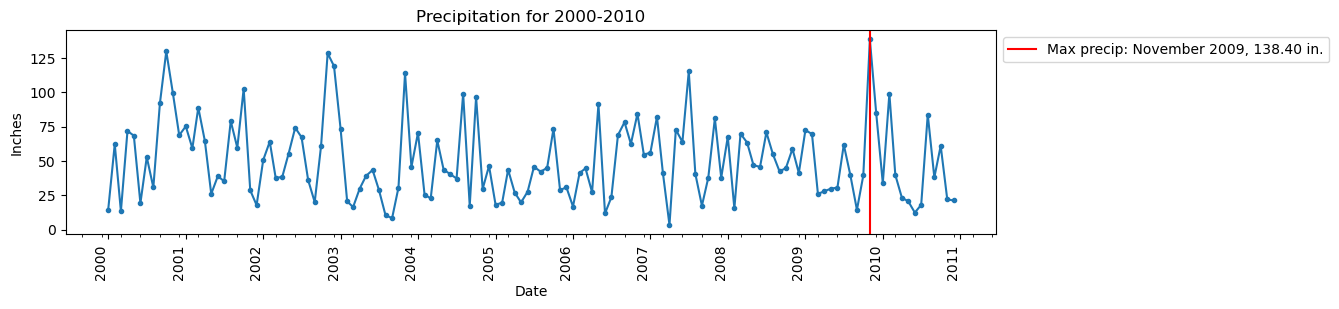

In [16]:
#Plot precipitation data
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(precip_df_MS, marker = '.')
ax.set(title = 'Precipitation for 2000-2010', ylabel = 'Inches', xlabel = 'Date')

#Set major ticks
major_loc = mdates.YearLocator(1)
major_fmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)

#Set minor ticks
minor_loc = mdates.MonthLocator(interval = 3)

ax.xaxis.set_minor_locator(minor_loc)

#Add vertical line for top precipitation
ax.axvline(date_max_precip, color = 'red', 
           label = f"Max precip: {date_max_precip.strftime('%B %Y')}, {max_precip:,.2f} in.")
ax.legend(bbox_to_anchor=[1,1])

#Final settings
fig = ax.get_figure()
fig.autofmt_xdate(which = 'major', rotation = 90);

#### Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.

### Q2: Which year between 2000-2020 had the coolest average temperature?

In [17]:
temp_cols = ['mean_temp']
temp_df = df.loc[: '2020', temp_cols]
temp_df

,mean_temp
date,
2000-01-01,7.0
2000-01-02,7.9
2000-01-03,9.4
2000-01-04,7.0
2000-01-05,6.4
...,...
2020-12-27,7.5
2020-12-28,1.1
2020-12-29,2.6


#### Resample the data as Yearly frequency.

In [18]:
#Resample to monthly frequency
temp_df_year = temp_df.resample("AS").mean()
temp_df_year

,mean_temp
date,
2000-01-01,11.575683
2001-01-01,11.331507
2002-01-01,12.084247
2003-01-01,12.114521
2004-01-01,11.900683
2005-01-01,11.822877
2006-01-01,12.290822
2007-01-01,11.944384
2008-01-01,11.326776


In [19]:
#Find date and corresponding value for max precipitation
year_cool_temp = temp_df_year['mean_temp'].idxmin()
min_temp = temp_df_year['mean_temp'].min()

print(f"The lowest average temperature of {min_temp:,.2f} degrees occurred in the year {year_cool_temp.strftime('%B %Y')}.")


The lowest average temperature of 10.66 degrees occurred in the year January 2010.


#### Plot the feature and time period that corresponds to the question
* Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    * Create a wide figure (e.g. figsize=(12,3))
        * With the title "Average Temperature"
        * With a ylabel of "Degrees"
* Customize the major xaxis ticks to:
    * Have major xaxis ticks every 5 years.
    * Use 4-digit years for the labels
    * Rotate the major ticks' labels 90 degrees.
* Customize the minor xaxis ticks to:
    * Have minor xaxis ticks every 1 year
    * Do not label the minor ticks.


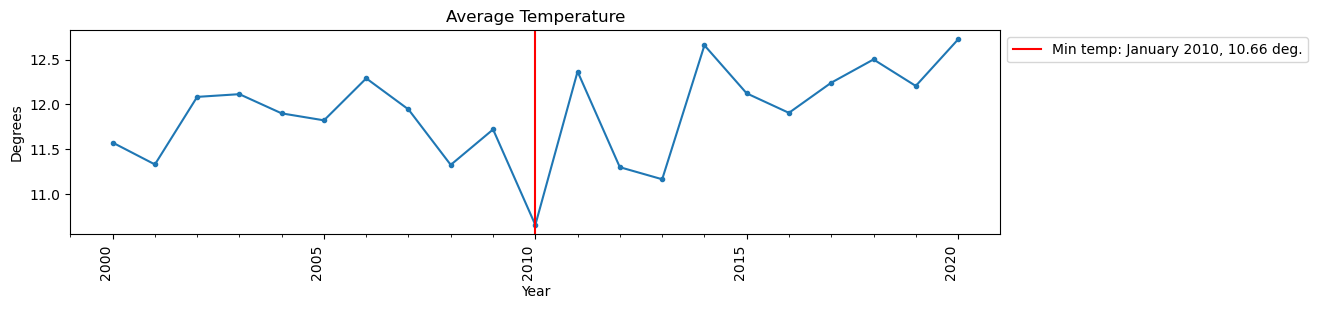

In [26]:
#Plot temperature data
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(temp_df_year, marker = '.')
ax.set(title = 'Average Temperature', ylabel = 'Degrees', xlabel = 'Year')

#Set major ticks
major_loc = mdates.YearLocator(5)
major_fmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)

#Set minor ticks
minor_loc = mdates.YearLocator(1)

ax.xaxis.set_minor_locator(minor_loc)

#Add vertical line for lowest temp
ax.axvline(year_cool_temp, color = 'red', 
           label = f"Min temp: {year_cool_temp.strftime('%B %Y')}, {min_temp:,.2f} deg.")
ax.legend(bbox_to_anchor=[1,1])

#Final settings
fig = ax.get_figure()
fig.autofmt_xdate(which = 'major', rotation = 90);

#### Determine the date and value for the lowest mean temp

#### Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.